<a href="https://colab.research.google.com/github/KumarRishabh/Alberta-Research/blob/main/Simulating_Persistent_RW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
# !pip install sphinx-proof

## Simulating Fair RW
The discrete fair random walk is the stochastic process defined as follows:
1. $X_0 = 0$
2. $P(X_n = X_{n-1} + 1 | X_n) = 0.5$, $P(X_n = X_{n-1} - 1 | X_n) = 0.5$


In [2]:
length = 1
fair_rw_flips = 2* np.random.choice(2, length, p = [0.5, 0.5]) - 1
print(int(fair_rw_flips))
fair_rw = np.cumsum(fair_rw_flips)
print(np.concatenate([np.array([0]), fair_rw]))

1
[0 1]


<ipython-input-2-4fa279215ef0>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(fair_rw_flips))


## Simulating Persistent Random Walk
- $X_0^p=0, P\left(X_1^p=-1\right)=\frac{1}{2}, P\left(X_1^p=1\right)=\frac{1}{2}$.
- $\forall n \geqslant 1, \varepsilon_n^p:=X_n^p-X_{n-1}^p$ equals 1 or $-1$ a.s.
- $\forall n \geqslant 1, P\left(\varepsilon_{n+1}^p=\varepsilon_n^p \mid \sigma\left(X_k^p, 0 \leqslant k \leqslant n\right)\right)=p$.

The proposal density being the fair random walk, want to do accept-reject (von neumann rejection sampling) to simulate the persistent random walk.


[  1   2   3   2   1   0  -1  -2  -3  -4  -5  -6  -5  -4  -3  -2  -3  -4
  -5  -6  -5  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -13 -12 -11 -10
  -9 -10  -9 -10 -11 -12 -11 -10 -11 -12 -11 -10 -11 -12]
50


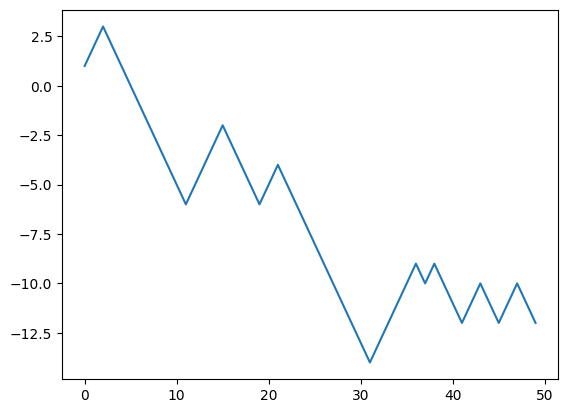

In [3]:
p = 0.7
def persistent_rw_flips(p, length = 1000, past_flip = None):
    if past_flip == None:
        c = 2 * max(p , 1 - p)
        X = np.array([0])
        proposal_flip = 2*np.random.choice(2, 1, p = [0.5, 0.5]) - 1
        print("Initial Proposal Flip: ", proposal_flip)
        X = np.concatenate([X, proposal_flip]) # X_0, X_1
        past_flip = proposal_flip
        count = 1
        while len(X) <= length:
        # for i in range(2, 100):
            proposal_flip = 2*np.random.choice(2, 1, p = [0.5, 0.5]) - 1
            u = np.random.uniform(low = 0, high = c)
            if u < 2 * (p if proposal_flip == past_flip else 1- p):  # IF U < f(x)/g(x) then accept else reject
                X = np.concatenate([X, proposal_flip])
                past_flip = proposal_flip
            count += 1
        # print("Efficiency of Acceptance-Rejection:", length/count)
        return X
    else:
        c = 2 * max(p , 1 - p)
        X = np.array([past_flip])
        # proposal_flip = 2*np.random.choice(2, 1, p = [0.5, 0.5]) - 1
        # print("Initial Proposal Flip: ", proposal_flip)
        # X = np.concatenate([X, proposal_flip]) # X_0, X_1
        # past_flip = proposal_flip
        count = 0
        while len(X) <= length:
        # for i in range(2, 100):
            proposal_flip = 2*np.random.choice(2, 1, p = [0.5, 0.5]) - 1
            u = np.random.uniform(low = 0, high = c)
            if u < 2 * (p if proposal_flip == past_flip else 1- p):  # IF U < f(x)/g(x) then accept else reject
                X = np.concatenate([X, proposal_flip])
                past_flip = proposal_flip
            count += 1
        # print("Efficiency of Acceptance-Rejection:", length/count)
        return X[1:]


flips = persistent_rw_flips(p, length= 50, past_flip = 1)
persistent_rw = np.cumsum(flips)
plt.plot(persistent_rw)
print(persistent_rw)
print(len(persistent_rw))

Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
I

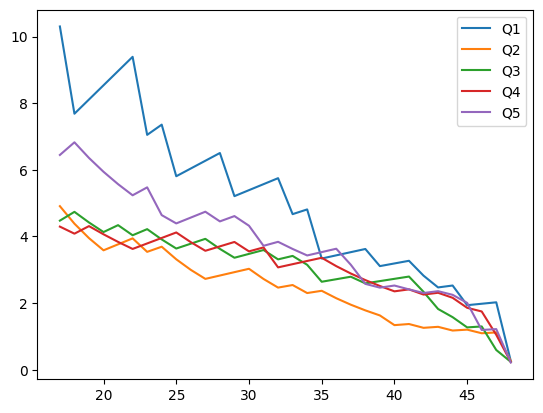

In [4]:
sample_paths = 50
quintiles = []
for i in range(sample_paths):
  persistent_rw = np.cumsum(persistent_rw_flips(p, 500))
  #plt.plot(persistent_rw)
  quintiles.append(persistent_rw[99::100])

quintiles = np.array(quintiles).T

for i in range(5):
  Z = -np.sort(quintiles[i])
  Z -= Z[-1] - 1
  rs = np.arange(2, len(Z)-1)
  hill = [r/np.sum(np.log(Z[1:r+1]/Z[r+1])) for r in rs]
  plt.plot(rs[15:], hill[15:], label="Q"+str(i+1))
plt.legend()
plt.show()

## Distribution of $\mu(p)$ is $\operatorname{U}(\frac{1}{2}, 1)$


Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]
Initial Proposal Flip:  [-1]


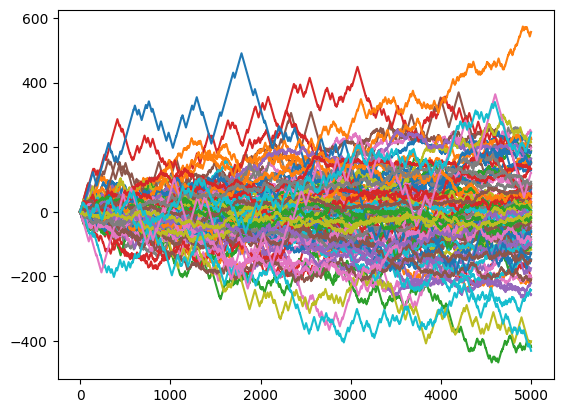

In [5]:
# H = 0.8
num_samples = 100
process_length = 5000
p = np.random.uniform(low = 1/2, high = 1, size = num_samples)
persistent_rw = np.zeros((num_samples, process_length))
for i in range(num_samples):
  # print(i)
  persistent_rw[i] = np.cumsum(persistent_rw_flips(p[i], process_length - 1))
  plt.plot(persistent_rw[i])

[ 0.          0.02828427  0.11313708 ... -0.79195959 -0.79195959
 -0.67882251]


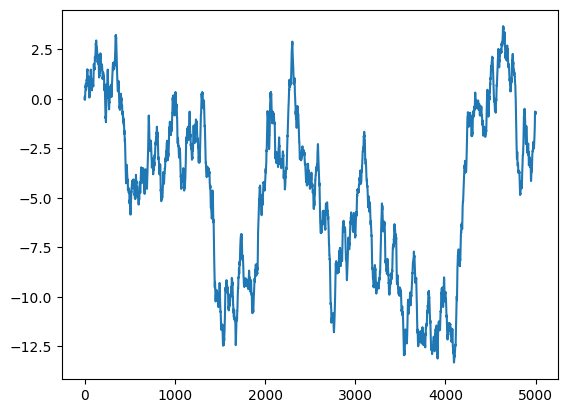

In [6]:
lrd_process = np.sum(persistent_rw, axis = 0)/np.sqrt(process_length)
print(lrd_process)
plt.plot(lrd_process)

## Trotter Product Idea
Small pieces are wrong - but over a larger scale (i.e., in the limit), the path converges to an FBM.
This only works for continuous time simulations.

In [7]:
def truncated_beta(low = 0, high = 1, a = 1, b = 1, size = 1): # Accept-Reject method to simulate truncated beta
  sample = []
  while len(sample) < size:
    proposed_sample = stat.beta.rvs(a, b, loc = 0, scale = 1, size = 1, random_state = None)
    if proposed_sample <= high and proposed_sample >= low:
      sample.append(proposed_sample)
    else:
      continue
  if size == 1:
    return sample[0]
  return sample

## The story about $\mu(p)$ $\color{red}{\text{IGNORE THIS SECTION}}$
The distribution $\mu(p)$ defined in [1], on the persistence parameter of the $p$-persistent random walk is the "Truncated Beta Distribution" with $a = 1, b = 2 - 2H$ with the truncation interval being  $[0.5, 1]$. The density of this Truncated Beta distribution is the following:
$$f_{\mu}(p) = (1 - H) 2^{3 - 2H} (1 - p)^{1 - 2H}, \, p \in \left(\frac{1}{2}, 1\right)$$
<b> The code to simulate FBM using the trotter-product type idea is contained in the cell below. </b>

As referred in [1], FBM can be approximated with $$\frac{\sum_{i = 1}^{M}X_{[Nt]}^{\mu_H, i}}{N^H \sqrt{M}}$$ as $ N \to \infty$ and $ M \to \infty$ in the skorokhod (pathwise) sense. This is done for discrete time steps.
## Trotter Product Idea
The idea behind the trotter product type approach is, instead of averaging over the "wrong" Gaussian Processes, we could make similar wrong jumps at small waiting times. This means that we conjecture that FBM can be approximated using $$ \frac{\sum_{n = 1}^{\infty} X_{[T_\color{red}{n} \wedge T, T_{\color{red}{n+1}} \wedge T]}^{\mu_H, \color{red}{n}} \mathbf{I}_{[T_\color{red}{n} \wedge T, T_{\color{red}{n+1}} \wedge T]}(t)}{ \sqrt(N)}$$
where $ T_n \sim \operatorname{Exp(N)}$ for large N.

$$ \mathscr{L}_D {N \to \infty} \frac{\sum_{n = 1}^{\infty} X_{[T_\color{red}{n} \wedge T, T_{\color{red}{n+1}} \wedge T]}^{\mu_H, \color{red}{n}} \mathbf{I}_{[T_\color{red}{n} \wedge T, T_{\color{red}{n+1}} \wedge T]}(t)}{ \sqrt(N)} = B_H(t) \quad \color{green}{\text{(Conjecture)}}$$

The above statement can be interpreted in the following way: After every jump, we sample a new '$p$' from the measure $\mu$, and conditioned on this $p$ we simulate the next piece/step of the $p$-persistent RW and keep on doing it until we reach the stopping time $T$. Instead of simulating $M$ variates of processes $X^\mu$, we only need to simulate a single process, where each of the jumps are modelled using sampling a single path from $X^\mu$.  To show that this process indeed converges to an FBM, we would like to use some variation of Berry-Esseen theorem to show that the covariance kernel converges to the a similar kernel as defined for the FBM.

### References
1. https://arxiv.org/abs/math/0210272

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49


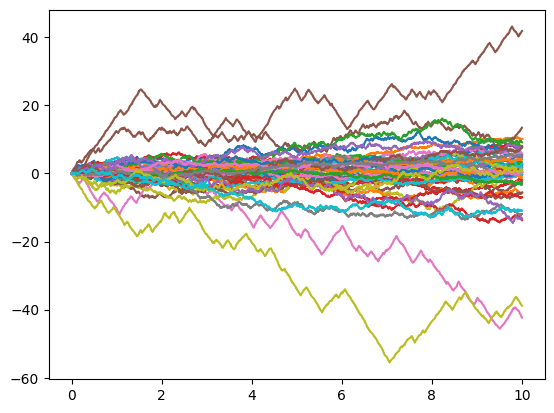

In [8]:
num_paths = 50 #@param {type:"number"}
time_limit = 10 #@param {type:"number"}
N = 20 #@param {type:"number"} # Time Scaling

H = 0.5 #@param {type:"number"}

path_flips = [np.array([0])]*num_paths
sample_paths = [np.array([0])]*num_paths
jump_times = [[0]]*num_paths
for i in range(num_paths):

    print("Iteration:", i)
    jump_times[i] = [0]
    path_flips[i] = np.array([0])
    while jump_times[i][-1] < time_limit:
        wait_time = np.random.exponential(scale = 1/N**2)
        jump_times[i].append(jump_times[i][-1] + wait_time)
        if len(path_flips[i]) == 1:
            proposal_flip = (2*np.random.choice(2, 1, p = [0.5, 0.5]) - 1)/N

            path_flips[i] = np.concatenate([path_flips[i], proposal_flip]) # X_0, X_1
            past_flip = proposal_flip
            count = 2
            # p = np.random.uniform(low = 1/2, high = 1)
            # sample p from the truncated beta distribution
            mu_p =  truncated_beta(low = 0.5, high = 1, a = 1, b = 2 - 2*H)
            c = 2 * max(mu_p , 1 - mu_p)
            continue
    # print("At jump time:", jump_times[-1])
        while True:
            proposal_flip = (2*np.random.choice(2, size = 1, p = [0.5, 0.5]) - 1)/N
      # print("Proposal Flip", proposal_flip)
            u = np.random.uniform(low = 0, high = c)
            count += 1
            if u < 2 * (mu_p if proposal_flip == past_flip else 1 - mu_p):  # IF U < f(x)/g(x) then accept else reject
                path_flips[i] = np.concatenate([path_flips[i], proposal_flip])
                past_flip = proposal_flip
                break
            else:
                continue
        past_flip = proposal_flip
        count = 1
    sample_paths[i] = np.cumsum(path_flips[i])
    # print(sample_path.shape)
    plt.plot(jump_times[i], sample_paths[i])




## Trotter Product {Simulating $X_{[0, \frac{1}{N}]}$ pieces}
$\color{green}{\text{MAIN IDEA}}$
The idea behind the trotter product type approach is, instead of averaging over the "wrong" Gaussian Processes, we could make similar wrong jumps at small waiting times. This means that we conjecture that FBM can be approximated using $$ \frac{\sum_{n = 1}^{\infty} X_{[\frac{n}{N}\wedge T, \frac{n+1}{N} ∧ T]}^{\mu_H, \color{red}{n}} \mathbf{I}_{[\frac{n}{N}\wedge T, \frac{n+1}{N} ∧ T]}(t)}{ N^H}$$
where $ T_n \sim \operatorname{Exp(N)}$ for large N.

$$ \mathscr{L}_D {N \to \infty} \frac{\sum_{n = 1}^{\infty} X_{[T_\color{red}{n} \wedge T, T_{\color{red}{n+1}} \wedge T]}^{\mu_H, \color{red}{n}} \mathbf{I}_{[T_\color{red}{n} \wedge T, T_{\color{red}{n+1}} \wedge T]}(t)}{ N^H} = B_H(t) \quad \color{green}{\text{(Conjecture)}}$$

The above statement can be interpreted in the following way: After every jump, we sample a new '$p$' from the measure $\mu$, and conditioned on this $p$ we simulate the next piece/step of the $p$-persistent RW and keep on doing it until we reach the stopping time $T$. Instead of simulating $M$ variates of processes $X^\mu$, we only need to simulate a single process, where each of the jumps are modelled using sampling a single path from $X^\mu$.  To show that this process indeed converges to an FBM, we would like to use some variation of Berry-Esseen theorem to show that the covariance kernel converges to the a similar kernel as defined for the FBM.

Streaming output truncated to the last 5000 lines.
Past Flip: 1.0
Total Jumps: 68
Step No.: 1334
Past Flip: -1.0
Total Jumps: 68
Step No.: 1335
Past Flip: -1.0
Total Jumps: 54
Step No.: 1336
Past Flip: 1.0
Total Jumps: 54
Step No.: 1337
Past Flip: -1.0
Total Jumps: 57
Step No.: 1338
Past Flip: -1.0
Total Jumps: 69
Step No.: 1339
Past Flip: -1.0
Total Jumps: 55
Step No.: 1340
Past Flip: 1.0
Total Jumps: 69
Step No.: 1341
Past Flip: -1.0
Total Jumps: 64
Step No.: 1342
Past Flip: -1.0
Total Jumps: 67
Step No.: 1343
Past Flip: -1.0
Total Jumps: 65
Step No.: 1344
Past Flip: -1.0
Total Jumps: 54
Step No.: 1345
Past Flip: 1.0
Total Jumps: 62
Step No.: 1346
Past Flip: -1.0
Total Jumps: 58
Step No.: 1347
Past Flip: 1.0
Total Jumps: 61
Step No.: 1348
Past Flip: -1.0
Total Jumps: 63
Step No.: 1349
Past Flip: -1.0
Total Jumps: 56
Step No.: 1350
Past Flip: 1.0
Total Jumps: 62
Step No.: 1351
Past Flip: -1.0
Total Jumps: 62
Step No.: 1352
Past Flip: -1.0
Total Jumps: 54
Step No.: 1353
Past Flip: -1.0

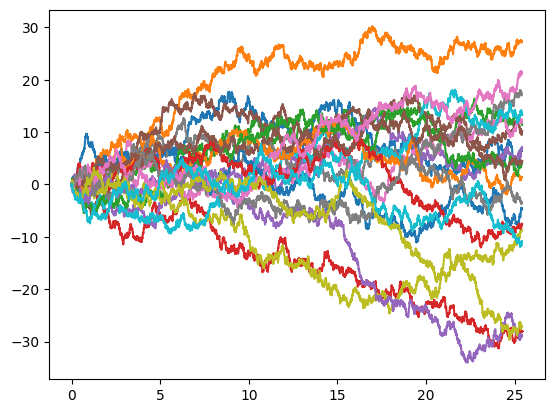

In [9]:
#@title Continuous jumps
# X_0 \to X_{1/N} idea

def A(path_flips, last_flip, mu_p):
    A = 1
    if last_flip == None: # If calculating A's for the first persitent rw piece
        for i in range(2, len(path_flips)):
            if path_flips[i] == path_flips[i - 1]:
                A *= 2 * mu_p
            else:
                A *= 2 * (1 - mu_p)

    else:
        for i in range(1, len(path_flips)):
            if path_flips[i] == path_flips[i - 1]:
                A *= 2 * mu_p
            else:
                A *= 2 * (1 - mu_p)

    return A

N = 60 #@param {type: "number"} Scaling limit
time_limit = 25 #@param {type: "number"}
X_0 = 0
num_paths = 20 #@param {type: "number"}
X = [X_0]

H = 0.75 #@param {type:"number"}
path_flips = [np.array([0])]*num_paths
sample_paths = [np.array([0])]*num_paths
jump_times = [[0] for i in range(num_paths)]
total_jumps = [[] for i in range(num_paths)]
discrete_steps = time_limit*N # Sample N paths
for i in range(num_paths):
    step = 0
    print("Iteration:", i)
    path_flips[i] = np.array([0])
    print("Discrete Steps:", discrete_steps)
    while step < discrete_steps:
        total_wait_upto_1_N = 0
        mu_p = truncated_beta(low = 0.5, high = 1, a = 1, b = 2 - 2*H)
        total_jumps[i].append(0)
        while total_wait_upto_1_N < 1/N:
            wait_time = np.random.exponential(scale = 1/N**2)
            jump_times[i].append(jump_times[i][-1] + wait_time)
            total_wait_upto_1_N += wait_time
            total_jumps[i][-1] += 1
        # Is it the first path_flip?
        if len(path_flips[i]) == 1:
            past_flip = None
        else:
            past_flip = path_flips[i][-1] * (np.sqrt(num_paths) * N**(H)) #Scaled accordingly to the persistent_rw_flips function
            print("Past Flip:", past_flip)
        # print("Proposed 'p':", mu_p)
        # print("Past Flip:", past_flip)
        # %%timeit
        persistent_rw = persistent_rw_flips(mu_p[0], total_jumps[i][-1], past_flip)/(N**(H) * np.sqrt(num_paths))
        # %%timeit
        if len(path_flips[i]) == 1:
            path_flips[i] = np.concatenate([path_flips[i], persistent_rw[1:]])
        else:
            path_flips[i] = np.concatenate([path_flips[i], persistent_rw])

        print("Total Jumps:", total_jumps[i][-1])
        # print("Random Walk jumps:", persistent_rw)
        # print("Jump Times:", jump_times[i])
        # print(len(jump_times[i]), len(path_flips[i]))
        print("Step No.:", step)
        step += 1


    sample_paths[i] = np.cumsum(path_flips[i])
    plt.plot(jump_times[i], sample_paths[i])








Streaming output truncated to the last 5000 lines.
Past Flip: 1.0
Total Jumps: 26
Step No.: 1334
Past Flip: 1.0
Total Jumps: 26
Step No.: 1335
Past Flip: 1.0
Total Jumps: 26
Step No.: 1336
Past Flip: -1.0
Total Jumps: 26
Step No.: 1337
Past Flip: -1.0
Total Jumps: 26
Step No.: 1338
Past Flip: -1.0
Total Jumps: 26
Step No.: 1339
Past Flip: -1.0
Total Jumps: 26
Step No.: 1340
Past Flip: -1.0
Total Jumps: 26
Step No.: 1341
Past Flip: 1.0
Total Jumps: 26
Step No.: 1342
Past Flip: 1.0
Total Jumps: 26
Step No.: 1343
Past Flip: -1.0
Total Jumps: 26
Step No.: 1344
Past Flip: -1.0
Total Jumps: 26
Step No.: 1345
Past Flip: -1.0
Total Jumps: 26
Step No.: 1346
Past Flip: 1.0
Total Jumps: 26
Step No.: 1347
Past Flip: 1.0
Total Jumps: 26
Step No.: 1348
Past Flip: 1.0
Total Jumps: 26
Step No.: 1349
Past Flip: -1.0
Total Jumps: 26
Step No.: 1350
Past Flip: 1.0
Total Jumps: 26
Step No.: 1351
Past Flip: 1.0
Total Jumps: 26
Step No.: 1352
Past Flip: 1.0
Total Jumps: 26
Step No.: 1353
Past Flip: 1.0
Total

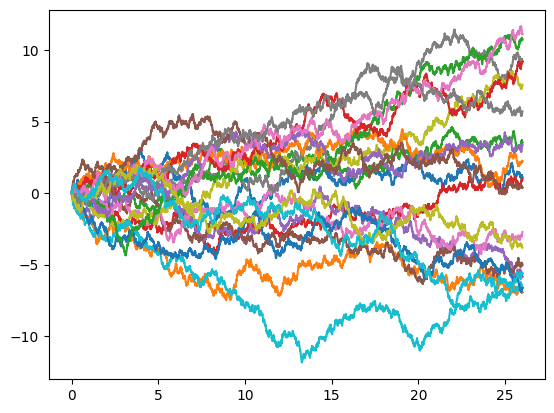

In [14]:
#@ Discrete Jumps
def A(path_flips, last_flip, mu_p):
    A = 1
    if last_flip == None: # If calculating A's for the first persitent rw piece
        for i in range(2, len(path_flips)):
            if path_flips[i] == path_flips[i - 1]:
                A *= 2 * mu_p
            else:
                A *= 2 * (1 - mu_p)

    else:
        for i in range(1, len(path_flips)):
            if path_flips[i] == path_flips[i - 1]:
                A *= 2 * mu_p
            else:
                A *= 2 * (1 - mu_p)

    return A

N = 60 #@param {type: "number"} Scaling limit
time_limit = 25 #@param {type: "number"}
X_0 = 0
num_paths = 20 #@param {type: "number"}
X = [X_0]

H = 0.75 #@param {type:"number"}
path_flips = [np.array([0])]*num_paths
sample_paths = [np.array([0])]*num_paths
jump_times = [[0] for i in range(num_paths)]
total_jumps = [[] for i in range(num_paths)]
discrete_steps = time_limit*N # Sample N paths
for i in range(num_paths):
    step = 0
    print("Iteration:", i)
    path_flips[i] = np.array([0])
    print("Discrete Steps:", discrete_steps)
    while step < discrete_steps:
        total_wait_upto_1_N = 0
        mu_p = truncated_beta(low = 0.5, high = 1, a = 1, b = 2 - 2*H)
        total_jumps[i].append(0)
        while total_wait_upto_1_N < 1/N:
            wait_time = 1/(N*time_limit)
            jump_times[i].append(jump_times[i][-1] + wait_time)
            total_wait_upto_1_N += wait_time
            total_jumps[i][-1] += 1
        # Is it the first path_flip?
        if len(path_flips[i]) == 1:
            past_flip = None
        else:
            past_flip = path_flips[i][-1] * (np.sqrt(N) * N**(H)) #Scaled accordingly to the persistent_rw_flips function
            print("Past Flip:", past_flip)
        # print("Proposed 'p':", mu_p)
        # print("Past Flip:", past_flip)
        # %%timeit
        persistent_rw = persistent_rw_flips(mu_p[0], total_jumps[i][-1], past_flip)/(N**(H) * np.sqrt(N))
        # %%timeit
        if len(path_flips[i]) == 1:
            path_flips[i] = np.concatenate([path_flips[i], persistent_rw[1:]])
        else:
            path_flips[i] = np.concatenate([path_flips[i], persistent_rw])

        print("Total Jumps:", total_jumps[i][-1])
        # print("Random Walk jumps:", persistent_rw)
        # print("Jump Times:", jump_times[i])
        # print(len(jump_times[i]), len(path_flips[i]))
        print("Step No.:", step)
        step += 1


    sample_paths[i] = np.cumsum(path_flips[i])
    plt.plot(jump_times[i], sample_paths[i])






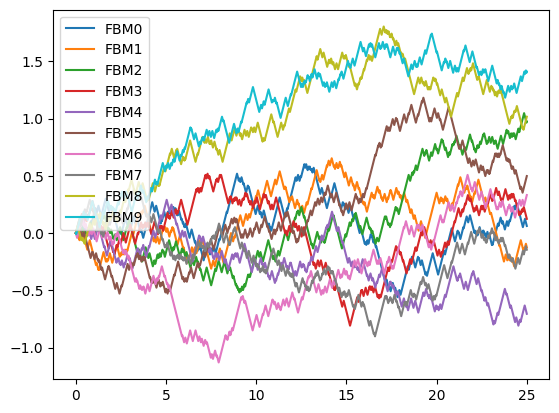

In [11]:
 # from scipy.stats import truncexpon as texp
# neg_exponential = -1 * texp.rvs(1/2, loc=-1, scale=1, size=100000, random_state=None)
# print(neg_exponential)
# plt.hist(neg_exponential, density = True)
# # exponential = -scipy.stats.truncexpon.rvs(1/2, loc=-1, scale=1, size=10000, random_state=None)
# # plt.hist(exponential, density = True)
for i in range(10):
    plt.plot(jump_times[i], sample_paths[i], label = "FBM" + str(i))
plt.legend()
plt.show()

In [12]:
alpgaas = [[0] for i in range(num_paths)]
alpgaas[1].append(1)
print(alpgaas)

[[0], [0, 1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]


In [13]:
x = np.array(jump_times[0])
print(np.flatnonzero(x > 1/N)[0])

2


In [ ]:
pip install hurst

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


P(normal):    0.5726896026535084
H (blocking): 0.45556602776792166
P(normal):    0.4748787822622015
H (blocking): 0.5909326797266629
P(normal):    0.013591707306225897
H (blocking): 0.6643662195844969
P(normal):    0.8278259592403584
H (blocking): 0.595014284608269
P(normal):    0.24005902428261014
H (blocking): 0.6772993600389285
P(normal):    0.21088147166802662
H (blocking): 0.5900924187598893
P(normal):    0.665829555063188
H (blocking): 0.5875318029100036
P(normal):    0.091697729061538
H (blocking): 0.5941571010413929
P(normal):    0.32126649582875266
H (blocking): 0.5879775184584703
P(normal):    0.3312658795115142
H (blocking): 0.5777156127310029
P(normal):    0.37847654899316285
H (blocking): 0.5263621454317269
P(normal):    0.5016897479710001
H (blocking): 0.5390919528985988
P(normal):    0.12804369379674144
H (blocking): 0.5053783813676583
P(normal):    0.29931339449346217
H (blocking): 0.5286580662450416
P(normal):    0.05287880407466054
H (blocking): 0.5776502449365449
P(n

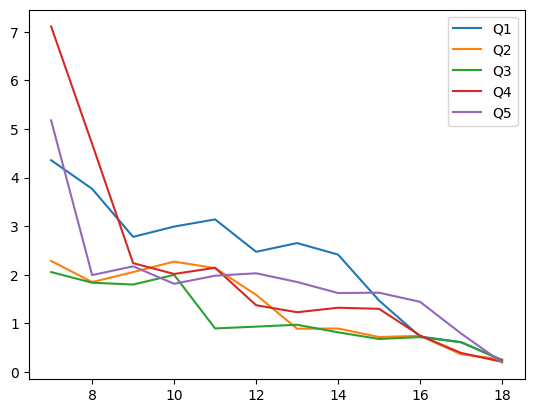

In [ ]:
from scipy.stats import normaltest
from hurst import compute_Hc

fig, ax = plt.subplots()
#N = 30

quintiles = []
for i in range(len(sample_paths)):
  path = sample_paths[i]
  path_leaps = path[np.cumsum(total_jumps[i])]
  inc = np.diff(path_leaps)
  k2, p = normaltest(inc)         # probability p of gaussian increments?
  print("P(normal):   ", p)
  # ax[0, i].hist(inc)     # plot


  H, c, _ = compute_Hc(path_leaps, kind='random_walk')
  print("H (blocking):", H)


  '''
  t = np.arange(1, len(path)+1)
  m = np.mean(path)
  Z = np.cumsum(path - m)
  R = max(Z) - min(Z)
  RS = R / np.sqrt(np.cumsum((path-m)**2) / t)
  ax[0, i].plot(np.log(t), np.log(RS))

  p = np.polyfit(np.log(t), np.log(RS), deg=1)
  ax[0, i].plot(np.log(t), p[0] * np.log(t) + p[1])
  print("H (regression?): ", p[0])
  '''
  quintile = path_leaps[time_limit*N//5-1::time_limit*N//5]
  quintiles.append(quintile)

quintiles = np.array(quintiles).T

for i in range(5):
  Z = -np.sort(quintiles[i])
  Z -= Z[-1] - 1
  rs = np.arange(2, len(Z)-1)
  hill = [r/np.sum(np.log(Z[1:r+1]/Z[r+1])) for r in rs]
  plt.plot(rs[5:], hill[5:], label="Q"+str(i+1))
plt.legend()
plt.show()

[ -1  -1  -1  -1  -3  -3  -5  -5  -7  -7  -7  -7  -7  -9  -9  -9 -11 -11
 -11 -11 -13 -13 -13 -13 -13 -15 -15 -15 -15 -15 -17 -17 -17 -17 -19 -19
 -19 -21 -23 -23 -25 -27 -27 -29 -29 -29 -31 -33 -33 -33]
[ -1  -1  -1  -1  -1  -3  -3  -5  -5  -5  -5  -7  -9  -9  -9  -9 -11 -13
 -13 -13 -15 -15 -17 -17 -17 -19 -21 -21 -21 -23 -23 -25 -25 -25 -25 -25
 -29 -29 -33 -33 -33 -35 -37 -37 -37 -41 -43 -45 -47 -49]
[ -1  -1  -5  -7  -7  -9 -11 -11 -11 -11 -13 -13 -13 -15 -15 -15 -17 -17
 -17 -17 -19 -21 -21 -23 -23 -25 -25 -25 -27 -27 -27 -29 -29 -29 -31 -33
 -35 -35 -37 -39 -39 -43 -43 -49 -51 -51 -51 -61 -65 -85]
[ -1  -3  -5  -5  -5  -7  -7  -9 -13 -15 -15 -17 -17 -19 -19 -21 -21 -23
 -23 -23 -23 -25 -25 -27 -27 -27 -29 -29 -31 -31 -33 -35 -37 -37 -39 -41
 -43 -45 -49 -49 -49 -49 -51 -53 -53 -55 -67 -69 -71 -95]
[  -1   -3   -5   -9   -9  -11  -13  -13  -15  -17  -19  -19  -19  -21
  -23  -23  -23  -25  -25  -25  -27  -27  -29  -31  -33  -33  -35  -35
  -35  -37  -39  -39  -41  -41  -43  -43  

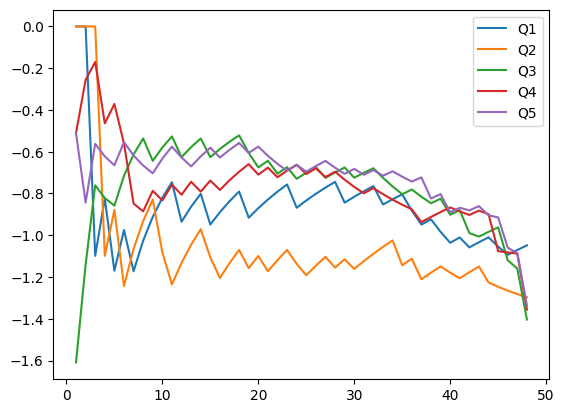

In [ ]:
print(np.flatnonzero(np.array([1, 1])))

[0 1]


Prob(normal):     0.4404665911310669
H (blocking):     0.6397543595826681 

Prob(normal):     0.903505898653373
H (blocking):     0.7914014511648385 

Prob(normal):     0.7947869419215414
H (blocking):     0.6776380285085997 

Prob(normal):     0.13723689317404186
H (blocking):     0.5875226566055742 

Prob(normal):     0.7225116904869152
H (blocking):     0.6526567571032211 



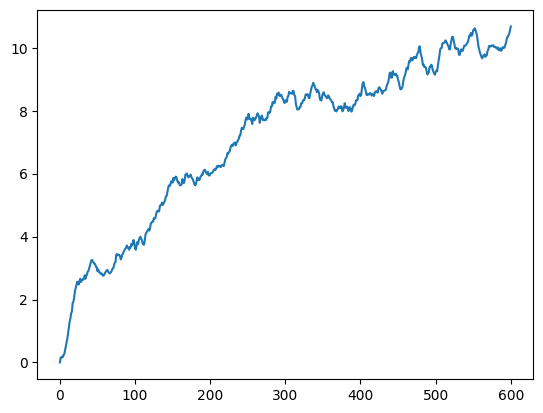

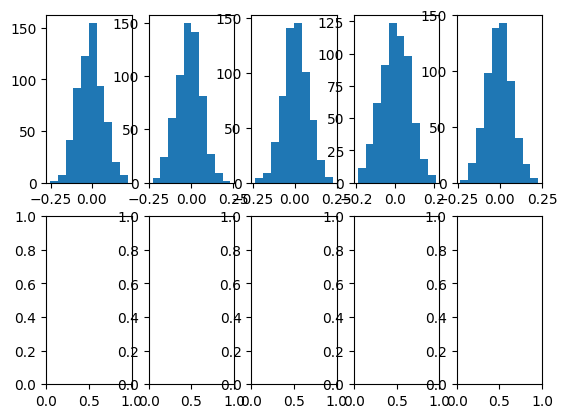

In [ ]:
# https://github.com/732jhy/Fractional-Brownian-Motion/blob/master/Davies_Harte.py

def davies_harte(T, N, H):
    '''
    Generates sample paths of fractional Brownian Motion using the Davies Harte method

    args:
        T:      length of time (in years)
        N:      number of time steps within timeframe
        H:      Hurst parameter
    '''
    gamma = lambda k,H: 0.5*(np.abs(k-1)**(2*H) - 2*np.abs(k)**(2*H) + np.abs(k+1)**(2*H))
    g = [gamma(k,H) for k in range(0,N)];    r = g + [0] + g[::-1][0:N-1]

    # Step 1 (eigenvalues)
    j = np.arange(0,2*N);   k = 2*N-1
    lk = np.fft.fft(r*np.exp(2*np.pi*complex(0,1)*k*j*(1/(2*N))))[::-1]

    # Step 2 (get random variables)
    Vj = np.zeros((2*N,2), dtype=complex);
    Vj[0,0] = np.random.standard_normal();  Vj[N,0] = np.random.standard_normal()

    for i in range(1,N):
        Vj1 = np.random.standard_normal();    Vj2 = np.random.standard_normal()
        Vj[i][0] = Vj1; Vj[i][1] = Vj2; Vj[2*N-i][0] = Vj1;    Vj[2*N-i][1] = Vj2

    # Step 3 (compute Z)
    wk = np.zeros(2*N, dtype=complex)
    wk[0] = np.sqrt((lk[0]/(2*N)))*Vj[0][0];
    wk[1:N] = np.sqrt(lk[1:N]/(4*N))*((Vj[1:N].T[0]) + (complex(0,1)*Vj[1:N].T[1]))
    wk[N] = np.sqrt((lk[0]/(2*N)))*Vj[N][0]
    wk[N+1:2*N] = np.sqrt(lk[N+1:2*N]/(4*N))*(np.flip(Vj[1:N].T[0]) - (complex(0,1)*np.flip(Vj[1:N].T[1])))

    Z = np.fft.fft(wk);     fGn = Z[0:N]
    fBm = np.cumsum(fGn)*(N**(-H))
    fBm = (T**H)*(fBm)
    path = np.array([0] + list(fBm))
    return path

fig, ax = plt.subplots()
ax.plot(np.arange(601), np.real(davies_harte(15, 600, 0.7)))
fig, ax = plt.subplots(2,5)

for i in range(5):
  path = np.real(davies_harte(15, 600, 0.7))
  inc = []
  for j in range(len(path)-1):
    inc.append(path[j+1]-path[j])
  k2, p = normaltest(inc)         # probability p of gaussian increments?
  print("Prob(normal):    ", p)
  ax[0,i].hist(inc)     # plot

  H, c, _ = compute_Hc(path, kind='random_walk')
  print("H (blocking):    ", H, "\n")

so these are the plots for the actual fbm, it does look pretty close so we might just need to increase our parameters

\what do you mean by increasing parameters\\\\\\\\\\\\\\\/ like N, time, or steps

## **Commented Block**

$\color{red}{\text{TODO}}:$
1. Test if the above process is really a Fractional Brownian Motion. Properties to test for:
    a. Test for Gaussian Increments
    b. Test for Hurst Parameter


<!-- 1. Parallelize the multiple simulation of FBM to get faster results [1] [2].  -->
<!-- 2. Make an interactive plot to play around with FBM -->


Reference:
1. https://yimingli.net/a-monte-carlo-simulation-workflow-in-python.html
2. https://www.alexpghayes.com/post/2020-08-25_many-models-workflows-in-python-part-i/


## Simulate FBM Gaussian



There are essentially two steps to simulate a fractional brownian motion:
1. Simulate a correlated centred gaussian process with the autocorrelation function as follows:
$$r(s | H) = (2 - 2H) \operatorname{Beta}(s + 1, 2 - H) $$
Where $H$ is the hurst parameter, and $\operatorname{Beta}$ is defined traditionally as the Beta function derived using the Gamma Integral (or function).

2. Subordinate the Gaussian process in the following fashion: Let $\{G_t\}_{t \in \mathbb{N}}$ be the Gaussian process, then the subordinated process is

---

defined to be $\{\frac{G_{[Nt]}}{N^H}\}_{t \in \mathbb{N}}$, for $ N \to \infty$



---
### Simulated Correlated Gaussian


---



## Simulating Anti-Persistent Random Walk
1. $\tilde{X}_0^p=0, P\left(\tilde{X}_1^p=-1\right)=1 / 2, P\left(\tilde{X}_1^p=1\right)=1 / 2$.
2. $\forall n \geqslant 1, \tilde{\varepsilon}_n^p:=\tilde{X}_n^p-\tilde{X}_{n-1}^p$ equals 1 or $-1$ a.s.
3. $\forall n \geqslant 1, P\left(\tilde{\varepsilon}_{2 n}^p=\tilde{\varepsilon}_{2 n-1}^p \mid \sigma\left(\tilde{X}_k^p, 0 \leqslant k \leqslant 2 n-1\right)\right)=p$.
4. $\forall n \geqslant 1, \tilde{\varepsilon}_{2 n+1}^p=-\tilde{\varepsilon}_{2 n}^p$.
